<a href="https://colab.research.google.com/github/DhruvBohara/Data-Augmentation-/blob/main/MyImage_Augly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U augly
!sudo apt-get install python3-magic

Requirement already up-to-date: augly in /usr/local/lib/python3.7/dist-packages (0.1.3)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-magic is already the newest version (2:0.4.15-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
from google.colab import files
from IPython import display

In [3]:
uploaded = files.upload()

Saving ep_0006_frame_1012.jpg to ep_0006_frame_1012 (2).jpg


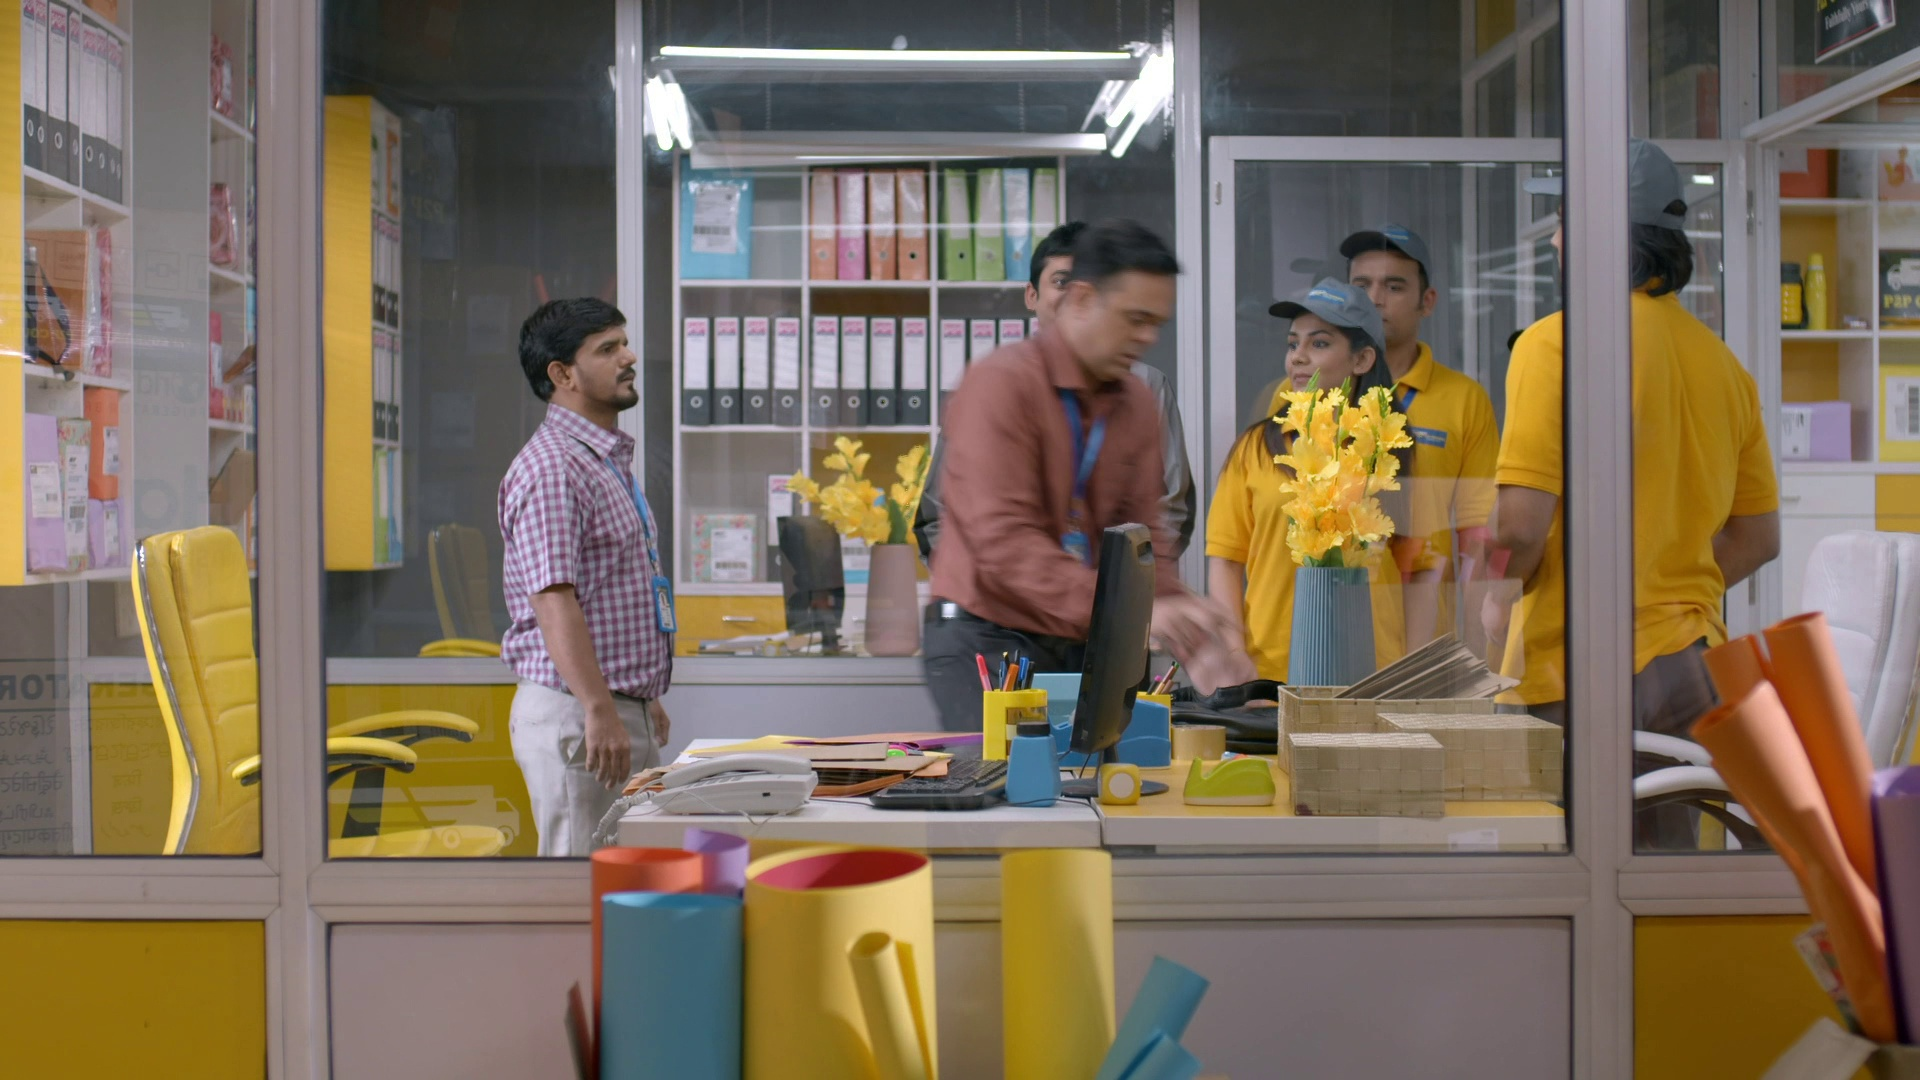

In [4]:
display.Image("ep_0006_frame_1012.jpg", width = 1000)

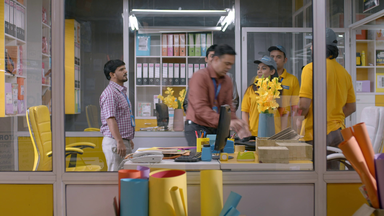

In [8]:
import os
import augly.image as imaugs
import augly.utils as utils
from IPython.display import display
input_img_path = "/content/ep_0006_frame_1012.jpg"
input_img = imaugs.scale(input_img_path, factor=0.2)
display(input_img)

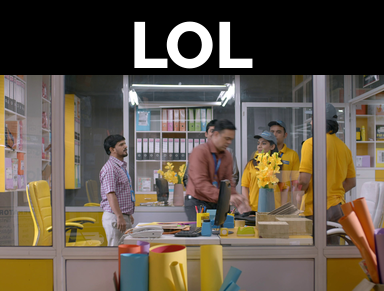

In [9]:
display(
    imaugs.meme_format(
        input_img,
        caption_height=75,
        meme_bg_color=(0, 0, 0),
        text_color=(255, 255, 255),
    )
)

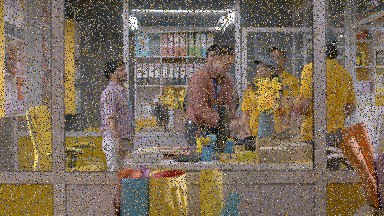

[{'dst_height': 216,
  'dst_width': 384,
  'factor': 0.3,
  'intensity': 30.0,
  'name': 'shuffle_pixels',
  'output_path': None,
  'seed': 10,
  'src_height': 216,
  'src_width': 384}]

In [10]:
meta = []
display(imaugs.shuffle_pixels(input_img, factor=0.3, metadata=meta))
meta

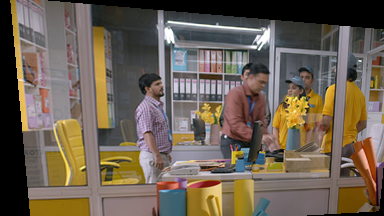

[{'crop_out_black_border': False,
  'dst_height': 216,
  'dst_width': 384,
  'dx': 0.0,
  'dy': 0.0,
  'intensity': 20.0,
  'name': 'perspective_transform',
  'output_path': None,
  'seed': 42,
  'sigma': 20.0,
  'src_height': 216,
  'src_width': 384}]

In [11]:
meta = []
aug = imaugs.PerspectiveTransform(sigma=20.0)
display(aug(input_img, metadata=meta))
meta

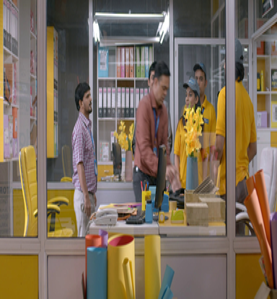

[]

In [14]:
meta = []
aug = imaugs.RandomAspectRatio()
display(aug(input_img))
meta

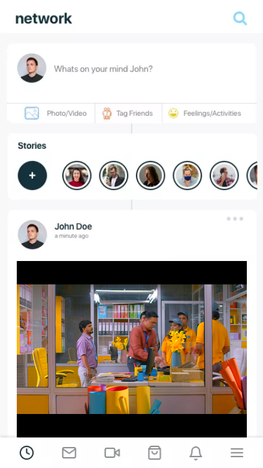

In [15]:
aug = imaugs.Compose(
    [
        imaugs.Saturation(factor=2.0),
        imaugs.OverlayOntoScreenshot(
            template_filepath=os.path.join(
                utils.SCREENSHOT_TEMPLATES_DIR, "mobile.png"
            ),
        ),
        imaugs.Scale(factor=0.6),
    ]
)
display(aug(input_img))

In [16]:
import torchvision.transforms as transforms

aug = transforms.Compose(
    [
        imaugs.Brightness(factor=2.0),
        imaugs.RandomRotation(),
        transforms.ToTensor(),
    ]
)
type(aug(input_img))

torch.Tensor

In [17]:
# We also provide a numpy wrapper in case your data is in np.ndarray format
import numpy as np
from augly.image import aug_np_wrapper, overlay_emoji

np_image = np.zeros((300, 300))
# pass in function arguments as kwargs
np_aug_img = aug_np_wrapper(np_image, overlay_emoji, **{'opacity': 0.5, 'y_pos': 0.45})
type(np_aug_img)

numpy.ndarray